In [1]:
import pandas as pd
dataset = pd.read_csv("dataset/A_Z Handwritten Data.csv")
dataset.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [3]:
dataset.astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

X = dataset.drop('label',axis = 1)
y = dataset['label']

In [4]:
alphabets="abcdefghijklmnopqrstuvwxyz"
letter_name=[]
[letter_name.append(i) for i in alphabets]
name_tag = pd.DataFrame(letter_name)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label'>

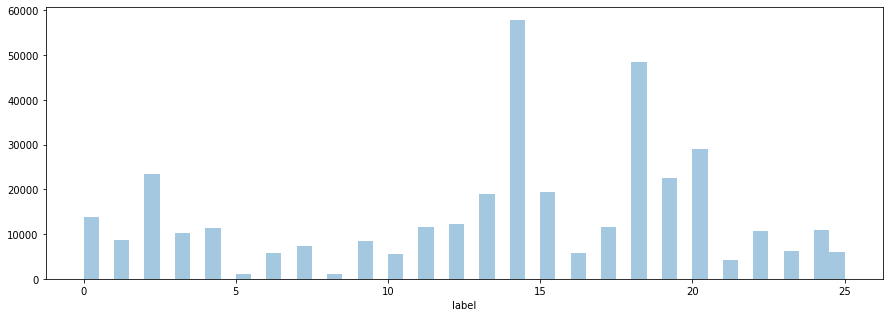

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.distplot(y,kde=False)

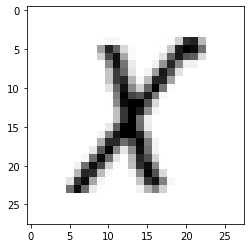

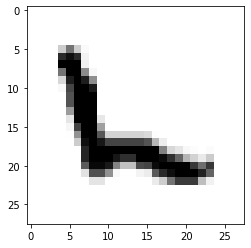

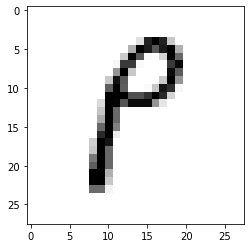

In [6]:
import numpy as np
np.random.seed(2)
for i in range(3):
    plt.imshow(X.iloc[np.random.randint(0,372449)].values.reshape(28,28),cmap='Greys')
    plt.show()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
dataset = np.loadtxt('dataset/A_Z Handwritten Data.csv', delimiter=',')

X = dataset[:,0:784]
Y = dataset[:,0]
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.3, random_state=2)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [9]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

num_classes = Y_test.shape[1]

In [10]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
Train1=model.fit(X_train, Y_train,batch_size=128, epochs=5)

Epoch 1/5
2037/2037 [==============================] - 68s 33ms/step - loss: 0.1990 - accuracy: 0.9442
Epoch 2/5
2037/2037 [==============================] - 70s 34ms/step - loss: 0.1003 - accuracy: 0.9717
Epoch 3/5
2037/2037 [==============================] - 66s 32ms/step - loss: 0.0878 - accuracy: 0.9749
Epoch 4/5
2037/2037 [==============================] - 67s 33ms/step - loss: 0.0801 - accuracy: 0.9771
Epoch 5/5
2037/2037 [==============================] - 68s 34ms/step - loss: 0.0730 - accuracy: 0.9796


In [12]:
Test1=model.fit(X_test, Y_test,batch_size=128, epochs=5)

Epoch 1/5
873/873 [==============================] - 29s 33ms/step - loss: 0.0950 - accuracy: 0.9745
Epoch 2/5
873/873 [==============================] - 31s 36ms/step - loss: 0.0708 - accuracy: 0.9792
Epoch 3/5
873/873 [==============================] - 30s 34ms/step - loss: 0.0615 - accuracy: 0.9822
Epoch 4/5
873/873 [==============================] - 28s 32ms/step - loss: 0.0579 - accuracy: 0.9829
Epoch 5/5
873/873 [==============================] - 28s 32ms/step - loss: 0.0552 - accuracy: 0.9844


In [13]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

model.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
Train2=model.fit(X_train, Y_train,batch_size=128, epochs=5)

Epoch 1/5
2037/2037 [==============================] - 73s 35ms/step - loss: 0.1932 - accuracy: 0.9462
Epoch 2/5
2037/2037 [==============================] - 72s 35ms/step - loss: 0.0650 - accuracy: 0.9824
Epoch 3/5
2037/2037 [==============================] - 72s 36ms/step - loss: 0.0468 - accuracy: 0.9875
Epoch 4/5
2037/2037 [==============================] - 73s 36ms/step - loss: 0.0359 - accuracy: 0.99050s - loss: 0.0359 - accuracy: 0.
Epoch 5/5
2037/2037 [==============================] - 73s 36ms/step - loss: 0.0288 - accuracy: 0.9924


In [15]:
Test2=model.fit(X_test, Y_test,batch_size=128, epochs=5)

Epoch 1/5
873/873 [==============================] - 32s 37ms/step - loss: 0.0441 - accuracy: 0.9888
Epoch 2/5
873/873 [==============================] - 35s 40ms/step - loss: 0.0295 - accuracy: 0.9924
Epoch 3/5
873/873 [==============================] - 36s 41ms/step - loss: 0.0218 - accuracy: 0.9944
Epoch 4/5
873/873 [==============================] - 36s 41ms/step - loss: 0.0159 - accuracy: 0.9958
Epoch 5/5
873/873 [==============================] - 35s 41ms/step - loss: 0.0118 - accuracy: 0.9967


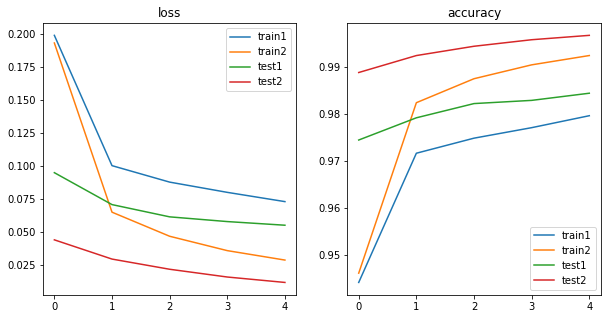

In [16]:
metrics = ['loss', 'accuracy']

plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]

    plt.subplot(1, 2, i+1)

    plt.title(metric) 
    plt_train1 = Train1.history[metric] 
    plt_test1 = Test1.history[metric]
    plt_train2 = Train2.history[metric]
    plt_test2 = Test2.history[metric] 
    #plot them all
    plt.plot(plt_train1, label='train1') 
    plt.plot(plt_train2, label='train2') 
    plt.plot(plt_test1, label='test1') 
    plt.plot(plt_test2, label='test2') 
    plt.legend() 
plt.show()

In [17]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
#Print the model
print(model.summary())
#Compile the model
model.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
________________________________________________

In [18]:
Train3=model.fit(X_train, Y_train,batch_size=128, epochs=5)
Test3=model.fit(X_test, Y_test,batch_size=128, epochs=5)

Epoch 1/5
2037/2037 [==============================] - 89s 44ms/step - loss: 0.1873 - accuracy: 0.9472
Epoch 2/5
2037/2037 [==============================] - 83s 41ms/step - loss: 0.0681 - accuracy: 0.9813
Epoch 3/5
2037/2037 [==============================] - 83s 41ms/step - loss: 0.0504 - accuracy: 0.9862
Epoch 4/5
2037/2037 [==============================] - 84s 41ms/step - loss: 0.0419 - accuracy: 0.9886
Epoch 5/5
2037/2037 [==============================] - 83s 41ms/step - loss: 0.0357 - accuracy: 0.9904
Epoch 1/5
873/873 [==============================] - 35s 41ms/step - loss: 0.0486 - accuracy: 0.9874
Epoch 2/5
873/873 [==============================] - 35s 40ms/step - loss: 0.0358 - accuracy: 0.9904
Epoch 3/5
873/873 [==============================] - 36s 41ms/step - loss: 0.0288 - accuracy: 0.9923
Epoch 4/5
873/873 [==============================] - 35s 40ms/step - loss: 0.0233 - accuracy: 0.9938
Epoch 5/5
873/873 [==============================] - 36s 42ms/step - loss: 0.0209

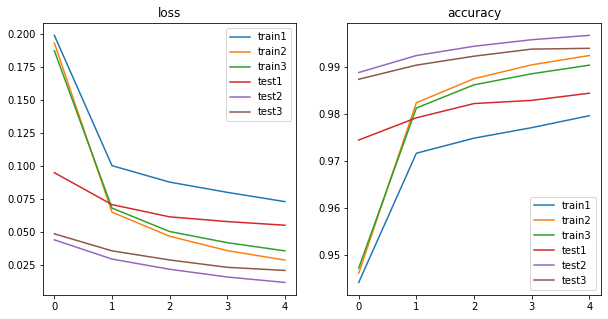

In [19]:
metrics = ['loss', 'accuracy']

plt.figure(figsize=(10, 5))

for i in range(len(metrics)):
    metric = metrics[i]
    plt.subplot(1, 2, i+1)
    plt.title(metric) 
    plt_train1 = Train1.history[metric] 
    plt_test1 = Test1.history[metric]
    plt_train2 = Train2.history[metric]
    plt_test2 = Test2.history[metric] 
    plt_train3 = Train3.history[metric]
    plt_test3 = Test3.history[metric] 
    plt.plot(plt_train1, label='train1') 
    plt.plot(plt_train2, label='train2') 
    plt.plot(plt_train3, label='train3') 
    plt.plot(plt_test1, label='test1') 
    plt.plot(plt_test2, label='test2') 
    plt.plot(plt_test3, label='test3') 
    plt.legend() 
plt.show()

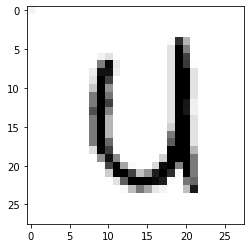

In [27]:
plt.imshow(X_test[[1]].reshape(28,28),cmap='Greys')

In [28]:
prediction=model.predict(X_test[[1]]) 
prediction

array([[1.78769408e-19, 1.86747314e-18, 6.89263871e-15, 6.56078664e-12,
        7.71599396e-25, 0.00000000e+00, 7.92115301e-17, 8.79892131e-11,
        7.75827879e-35, 1.68357620e-10, 1.62735001e-16, 3.24981125e-10,
        1.63847158e-09, 1.24392319e-09, 2.20738827e-09, 3.82219611e-20,
        5.68252476e-12, 9.87721264e-21, 2.45152800e-18, 1.28383278e-17,
        9.99999762e-01, 5.38050449e-09, 2.86007577e-07, 3.29284981e-22,
        7.43411843e-12, 1.18046756e-26]], dtype=float32)

In [29]:
#Preparation for this predction. 
alphabets="abcdefghijklmnopqrstuvwxyz"
list1=[]
[list1.append(i) for i in range(26)]
list2=[]
[list2.append(i) for i in alphabets]
dic = dict(zip(list1, list2))
#Let's check the result.
print("The answer is",dic[np.argmax(prediction)],". :-)")

The answer is u . :-)


In [23]:
model.save("Model.h5")